## Homework 4 SVM for text data
#### Date: Oct22, 2022
#### Author: Yilin Yang

#### Method Introduction 

1. Dataset Introduction

    This dataset contains text I collected from twitter api. The text mainly talks about the users' reviews about consumers privacy by using media. 
    Then I use sentiment analysis to determine the users' attitudes (Neutral, Positive, Negaitve) and assign a attitude socres about their texts. 
    There are 1299 rows and 4 columns in this dataset. 

        Unnamed: 0 : The number id of each content

        text: Each review from twitter users

        result: Sentiment classification of each text(Positive, Neutral, Negative)

        scores: Attitude scores. How likely the attitude to be Neutral, Postive, Negative

2. Methods I plan to use

    Support Vector Machine

    Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. The advantages of support vector machines are: Effective in high dimensional spaces. Still effective in cases where number of dimensions is greater than the number of samples.

    For this dataset, I want to build a model by using Support Vecotr Machines to predict the sentiment of each text. I plan to calculate the accuracy score and plot the confusion matrix in order to gain a result to determine whether SVM is suitable for this dataset. 
    
3. Steps 

Import datasets

        Drop unnecessary columns from the dataset(From this dataset, I mainly use text and result columns)

Basic data exploration

    Make some necessary EDA plots to get some first insight of the dataset. 

    I will use y = "result" (output_score) and "text" as feature. 

    Then I will reprocess the column text (Important!)

            1. Drop NA
            2. Change all letters to lower case
            3. Broke the sentence into words
            4. Remove stopwords

Split Dataset

        I will split dataset into 80% training data and 20% test data to get better prediction for SVM

Training the model and Testing the results

        Use x_train,y_train to build a model of SVM

        Evaluate the performance of the SVM model by using the test data. 
            
            Train different kernel in order to get the best performance of model

            Generate a confusion matrix plot for SVM model to evaluate the performance
    
Conclusion

        Gather the result of the SVM performance

#### Step 1 Import Dataset

In [2]:
# Read dataset in pd.read_csv and display first several rows.
import pandas as pd
df = pd.read_csv("/Users/yangyilin/Desktop/anly-501-project-YilinYang2000-1/data/00-raw-data/pytweetresult.csv")
df.head()

,Unnamed: 0,text,result,scores
0,0,RT @LittleBirbMame: @aungaung1124 ตอบให้ตรงคำถ...,Neutral,100.0
1,1,RT @LittleBirbMame: @yamyummy ประทับใจความดักด...,Neutral,100.0
2,2,RT @angel_packsss: 🎉PROMOÇÕES QUE ESTÃO ROLAND...,Neutral,100.0
3,3,"RT @wayydaminn: I love my privacy, not everyth...",Positive,44.7
4,4,RT @sapph7c: Hawaii is an island with even sma...,Negative,11.4


In [5]:
# Print shape and columns of the dataset and describe the dataset
print(df.shape)
print(df.columns)
print(df.describe)

(1299, 4)
Index(['Unnamed: 0', 'text', 'result', 'scores'], dtype='object')
<bound method NDFrame.describe of       Unnamed: 0                                               text    result  \
0              0  RT @LittleBirbMame: @aungaung1124 ตอบให้ตรงคำถ...   Neutral   
1              1  RT @LittleBirbMame: @yamyummy ประทับใจความดักด...   Neutral   
2              2  RT @angel_packsss: 🎉PROMOÇÕES QUE ESTÃO ROLAND...   Neutral   
3              3  RT @wayydaminn: I love my privacy, not everyth...  Positive   
4              4  RT @sapph7c: Hawaii is an island with even sma...  Negative   
...          ...                                                ...       ...   
1294        1294  •Link do privacy: https://t.co/6usYIrNIyz 🌸\n\...  Positive   
1295        1295  RT @LittleBirbMame: @yamyummy ประทับใจความดักด...   Neutral   
1296        1296  RT @bblivery: ดาราไทยส่วนใหญ่มันเคยสนใจ privac...   Neutral   
1297        1297  RT @goldenstarglow: its actually really concer...  Positive   

#### Step 2: Basic data exploration

In [8]:
#Insert code to explore the load balance and count the times infl_score = 0 and infl_score = 1
print("Number of points with result = Negative:",sum(df['result']=='Negative'),sum(df['result']=='Negative')/(sum(df['result']=='Negative')+sum(df['result']=='Neutral')+sum(df['result']=='Positive')))
print("Number of points with result = Neutral:",sum(df['result']=='Neutral'),sum(df['result']=='Neutral')/(sum(df['result']=='Negative')+sum(df['result']=='Neutral')+sum(df['result']=='Positive')))
print("Number of points with result = Neutral:",sum(df['result']=='Positive'),sum(df['result']=='Positive')/(sum(df['result']=='Negative')+sum(df['result']=='Neutral')+sum(df['result']=='Positive')))

Number of points with result = Negative: 254 0.19553502694380293
Number of points with result = Neutral: 725 0.5581216320246344
Number of points with result = Neutral: 320 0.24634334103156275


##### Make Visulization plot of EDA

<AxesSubplot:>

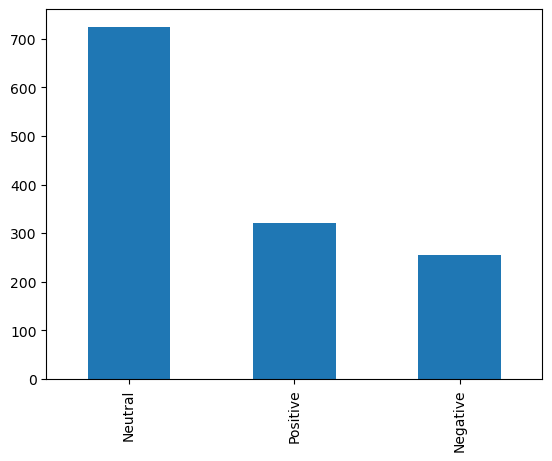

In [11]:
df['result'].value_counts().plot(kind="bar")


As we can see in the plot, Neutral is above 50% in the result of this dataset, the second more value is Postive, then is Negative

In [12]:
df = df.drop(['Unnamed: 0','scores'],axis=1) #Drop unnecessary columns

In [13]:
# Import required packages
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
# insert code to remove blank rows if any.
df['text'].dropna()
# Change all the text to lower case.
df['text'] = [entry.lower() for entry in df['text']]
# Tokenization In this each entry in the df will be broken into set of words
df['text'] = [word_tokenize(entry) for entry in df['text']]
# Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df['text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    df.loc[index,'text_final'] = str(Final_words)

In [15]:
df = df.drop(['text'],axis=1) # Drop Initial text column

In [16]:
df['text_final'].head() # Show first 5 rows of the edited column

0        ['rt', 'littlebirbmame', 'unicef', 'privacy']
1    ['rt', 'littlebirbmame', 'yamyummy', 'unicef',...
2    ['rt', 'que', 'estão', 'pack', 'masturbacão', ...
3    ['rt', 'wayydaminn', 'love', 'privacy', 'every...
4    ['rt', 'hawaii', 'island', 'even', 'small', 'p...
Name: text_final, dtype: object

#### Step 3 Split dataset

In [19]:
# Insert code to partition datasets into training and testing datasets and print types and shapes of these datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['text_final'],df['result'],test_size=0.8)
print(type(x_train),x_train.shape)
print(type(y_train),y_train.shape)
print(type(x_test),x_test.shape)
print(type(y_test),y_test.shape)

<class 'pandas.core.series.Series'> (259,)
<class 'pandas.core.series.Series'> (259,)
<class 'pandas.core.series.Series'> (1040,)
<class 'pandas.core.series.Series'> (1040,)


In [24]:
# Insert code to encode the column infl_score with value between 0 and 1 and 2. 0 represents Negative, 1 represents Neutral, 2 represnets Positive
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

Word Vectorization

It is a general process of turning a collection of text documents into numerical feature vectors.Their are many methods to convert text data to vectors which the model can understand but by far the most popular method is called TF-IDF. This is an acronym than stands for “Term Frequency — Inverse Document” Frequency which are the components of the resulting scores assigned to each word.

Term Frequency: This summarizes how often a given word appears within a document.

Inverse Document Frequency: This down scales words that appear a lot across documents.

we will transform x_train and x_test to vectorized Train_X_Tfidf and Test_X_Tfidf. These will now contain for each row a list of unique integer number and its associated importance as calculated by TF-IDF.

In [26]:

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(x_train)
Test_X_Tfidf = Tfidf_vect.transform(x_test)

In [27]:
print(Train_X_Tfidf)

  (0, 2361)	0.5736015800806065
  (0, 1948)	0.1137703036257489
  (0, 705)	0.5736015800806065
  (0, 8)	0.5736015800806065
  (1, 2627)	0.1986563062776938
  (1, 2372)	0.22287669365322268
  (1, 2127)	0.04125971137078998
  (1, 1964)	0.26126509939637615
  (1, 1924)	0.26126509939637615
  (1, 1596)	0.19326987568354315
  (1, 1388)	0.26126509939637615
  (1, 1387)	0.24709708102875164
  (1, 1302)	0.22287669365322268
  (1, 1208)	0.15942517386872607
  (1, 1031)	0.26126509939637615
  (1, 944)	0.26126509939637615
  (1, 856)	0.17592306387899886
  (1, 836)	0.26126509939637615
  (1, 684)	0.26126509939637615
  (1, 652)	0.11256278732932483
  (1, 452)	0.22287669365322268
  (1, 319)	0.2174902630590721
  (1, 315)	0.23704471202084723
  (1, 60)	0.24709708102875164
  (2, 2690)	0.3135928556197664
  :	:
  (256, 1456)	0.21975238988542523
  (256, 1208)	0.11604433940687903
  (256, 1111)	0.3803456522429738
  (256, 797)	0.2851290611830721
  (256, 545)	0.3244604105682101
  (256, 204)	0.3803456522429738
  (257, 2127)	0.20

Now the column text is ready to be fed into SVM algortithms.

#### Step 4 Training and Predicting the model

In [29]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVC = svm.SVC()
model = SVC.fit(Train_X_Tfidf,y_train)
# predict the labels on validation dataset
yp_train = model.predict(Train_X_Tfidf)
yp_test = model.predict(Test_X_Tfidf)

In [30]:
print("confusion matrix of train data:")
print(confusion_matrix(y_train,yp_train))
print(" ")
print("confusion matrix of test data:")
print(confusion_matrix(y_test,yp_test))
print(" ")
print("classification report of train data:")
print(classification_report(y_train,yp_train))
print(" ")
print("classification report of test data:")
print(classification_report(y_test,yp_test))

confusion matrix of train data:
[[ 47   0   0]
 [  0 144   0]
 [  0   0  68]]
 
confusion matrix of test data:
[[ 67 139   1]
 [  0 581   0]
 [  0 135 117]]
 
classification report of train data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00       144
           2       1.00      1.00      1.00        68

    accuracy                           1.00       259
   macro avg       1.00      1.00      1.00       259
weighted avg       1.00      1.00      1.00       259

 
classification report of test data:
              precision    recall  f1-score   support

           0       1.00      0.32      0.49       207
           1       0.68      1.00      0.81       581
           2       0.99      0.46      0.63       252

    accuracy                           0.74      1040
   macro avg       0.89      0.60      0.64      1040
weighted avg       0.82      0.74      0.70      1040



In [31]:
# Save the results in a data frame. 
dic_train = classification_report(y_train,yp_train,output_dict=True)
dic_test = classification_report(y_test,yp_test,output_dict=True)
result_train = pd.DataFrame.from_dict(dic_train)
result_train = result_train.transpose()
result_test = pd.DataFrame.from_dict(dic_test)
result_test = result_test.transpose()

In [32]:
# display the results data frame
print("result dataframe of train dataset:")
print(result_train)
print("")
print("result dataframe of test dataset:")
print(result_test)

result dataframe of train dataset:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     47.0
1                   1.0     1.0       1.0    144.0
2                   1.0     1.0       1.0     68.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    259.0
weighted avg        1.0     1.0       1.0    259.0

result dataframe of test dataset:
              precision    recall  f1-score      support
0              1.000000  0.323671  0.489051   207.000000
1              0.679532  1.000000  0.809192   581.000000
2              0.991525  0.464286  0.632432   252.000000
accuracy       0.735577  0.735577  0.735577     0.735577
macro avg      0.890353  0.595986  0.643559  1040.000000
weighted avg   0.818916  0.735577  0.702642  1040.000000


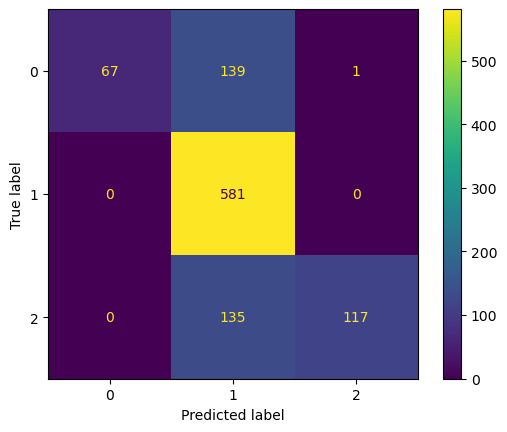

In [33]:
# Display Confusion Matrix for the test data. Remember to use the ConfusionMatrixDisplay function.
ConfusionMatrixDisplay.from_predictions(y_test, yp_test)

Comment: As we can see, the precision, recall, f1-score and support of accuracy are all about 73%, which we can conclude SVM is a good model to predict the sentiment analysis of this text dataset. 

##### Tuning Hyperparameters

Kernel: The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers

In this dataset, I will train different kernels('poly','RBF' and 'Linear') to determine which suports the most accurate classifers.

##### SVM with Polynomial kernels

A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space.

K(x,xi) = 1 + sum(x * xi)^d

In [34]:
SVC = svm.SVC(C = 0.5,degree = 2,kernel='poly')
model = SVC.fit(Train_X_Tfidf, y_train)
yp_train = SVC.predict(Train_X_Tfidf)
yp_test = SVC.predict(Test_X_Tfidf)

In [35]:
# Calculate the confusion matrix and classification report for the train and test data. 
print("confusion matrix of train data:")
print(confusion_matrix(y_train,yp_train))
print(" ")
print("confusion matrix of test data:")
print(confusion_matrix(y_test,yp_test))
print(" ")
print("classification report of train data:")
print(classification_report(y_train,yp_train))
print(" ")
print("classification reportof test data:")
print(classification_report(y_test,yp_test))

confusion matrix of train data:
[[ 21  26   0]
 [  0 144   0]
 [  1  36  31]]
 
confusion matrix of test data:
[[ 60 147   0]
 [  0 581   0]
 [  0 175  77]]
 
classification report of train data:
              precision    recall  f1-score   support

           0       0.95      0.45      0.61        47
           1       0.70      1.00      0.82       144
           2       1.00      0.46      0.63        68

    accuracy                           0.76       259
   macro avg       0.88      0.63      0.69       259
weighted avg       0.82      0.76      0.73       259

 
classification reportof test data:
              precision    recall  f1-score   support

           0       1.00      0.29      0.45       207
           1       0.64      1.00      0.78       581
           2       1.00      0.31      0.47       252

    accuracy                           0.69      1040
   macro avg       0.88      0.53      0.57      1040
weighted avg       0.80      0.69      0.64      1040



In [36]:
# Save the results in a data frame.
dic_train = classification_report(y_train,yp_train,output_dict=True)
dic_test = classification_report(y_test,yp_test,output_dict=True)
result_train = pd.DataFrame.from_dict(dic_train)
result_train = result_train.transpose()
result_test = pd.DataFrame.from_dict(dic_test)
result_test = result_test.transpose()

In [37]:
# display the results data frame
print("result dataframe of train dataset:")
print(result_train)
print("")
print("result dataframe of test dataset:")
print(result_test)

result dataframe of train dataset:
              precision    recall  f1-score     support
0              0.954545  0.446809  0.608696   47.000000
1              0.699029  1.000000  0.822857  144.000000
2              1.000000  0.455882  0.626263   68.000000
accuracy       0.756757  0.756757  0.756757    0.756757
macro avg      0.884525  0.634230  0.685938  259.000000
weighted avg   0.824416  0.756757  0.732378  259.000000

result dataframe of test dataset:
              precision    recall  f1-score      support
0              1.000000  0.289855  0.449438   207.000000
1              0.643411  1.000000  0.783019   581.000000
2              1.000000  0.305556  0.468085   252.000000
accuracy       0.690385  0.690385  0.690385     0.690385
macro avg      0.881137  0.531804  0.566847  1040.000000
weighted avg   0.800790  0.690385  0.640313  1040.000000


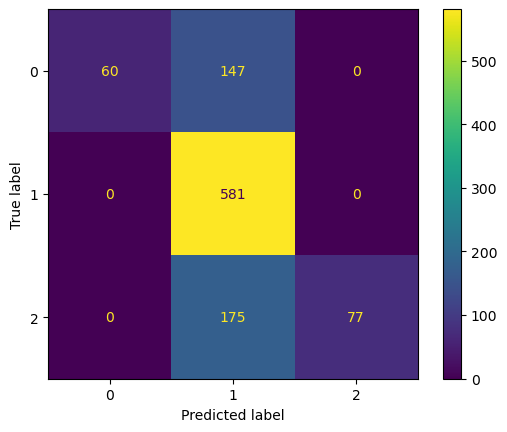

In [38]:
# Display Confusion Matrix for the test data. Remember to use the ConfusionMatrixDisplay function.
ConfusionMatrixDisplay.from_predictions(y_test, yp_test)

##### SVM with RBF kernels

Radial Basis Function Kernel The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space.

K(x,xi) = exp(-gamma * sum((x – xi^2))

In [39]:
SVC = svm.SVC(C = 0.5,kernel='rbf')
model = SVC.fit(Train_X_Tfidf, y_train)
yp_train = SVC.predict(Train_X_Tfidf)
yp_test = SVC.predict(Test_X_Tfidf)

In [40]:
# Save the results in a data frame.
dic_train = classification_report(y_train,yp_train,output_dict=True)
dic_test = classification_report(y_test,yp_test,output_dict=True)
result_train = pd.DataFrame.from_dict(dic_train)
result_train = result_train.transpose()
result_test = pd.DataFrame.from_dict(dic_test)
result_test = result_test.transpose()
# display the results data frame
print("result dataframe of train dataset:")
print(result_train)
print("")
print("result dataframe of test dataset:")
print(result_test)

result dataframe of train dataset:
              precision    recall  f1-score     support
0              1.000000  0.446809  0.617647   47.000000
1              0.692308  1.000000  0.818182  144.000000
2              1.000000  0.441176  0.612245   68.000000
accuracy       0.752896  0.752896  0.752896    0.752896
macro avg      0.897436  0.629328  0.682691  259.000000
weighted avg   0.828928  0.752896  0.727723  259.000000

result dataframe of test dataset:
              precision    recall  f1-score      support
0              1.000000  0.289855  0.449438   207.000000
1              0.642699  1.000000  0.782492   581.000000
2              1.000000  0.301587  0.463415   252.000000
accuracy       0.689423  0.689423  0.689423     0.689423
macro avg      0.880900  0.530481  0.565115  1040.000000
weighted avg   0.800392  0.689423  0.638886  1040.000000


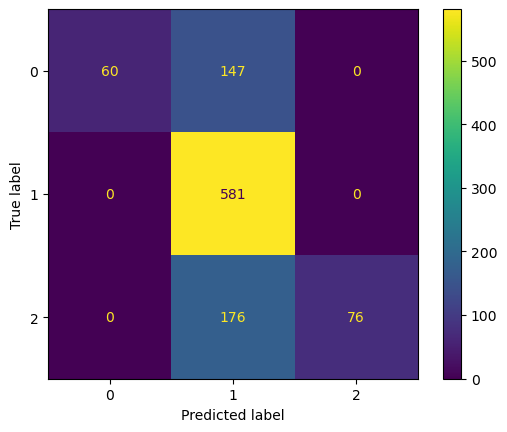

In [41]:
# Display Confusion Matrix for the test data. Remember to use the ConfusionMatrixDisplay function.
ConfusionMatrixDisplay.from_predictions(y_test, yp_test)

##### SVM with Linear Kernels

A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.

K(x, xi) = sum(x * xi)

In [42]:
SVC = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
model = SVC.fit(Train_X_Tfidf, y_train)
yp_train = SVC.predict(Train_X_Tfidf)
yp_test = SVC.predict(Test_X_Tfidf)


In [43]:
# Save the results in a data frame.
dic_train = classification_report(y_train,yp_train,output_dict=True)
dic_test = classification_report(y_test,yp_test,output_dict=True)
result_train = pd.DataFrame.from_dict(dic_train)
result_train = result_train.transpose()
result_test = pd.DataFrame.from_dict(dic_test)
result_test = result_test.transpose()
# display the results data frame
print("result dataframe of train dataset:")
print(result_train)
print("")
print("result dataframe of test dataset:")
print(result_test)

result dataframe of train dataset:
              precision    recall  f1-score     support
0              0.978723  0.978723  0.978723   47.000000
1              1.000000  1.000000  1.000000  144.000000
2              0.985294  0.985294  0.985294   68.000000
accuracy       0.992278  0.992278  0.992278    0.992278
macro avg      0.988006  0.988006  0.988006  259.000000
weighted avg   0.992278  0.992278  0.992278  259.000000

result dataframe of test dataset:
              precision    recall  f1-score      support
0              0.897436  0.338164  0.491228   207.000000
1              0.776224  0.955250  0.856481   581.000000
2              0.748988  0.734127  0.741483   252.000000
accuracy       0.778846  0.778846  0.778846     0.778846
macro avg      0.807549  0.675847  0.696398  1040.000000
weighted avg   0.793750  0.778846  0.755917  1040.000000


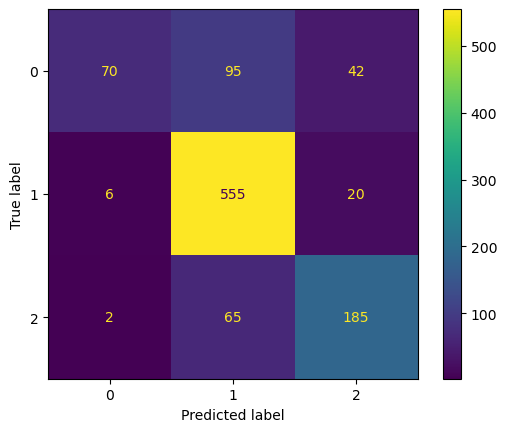

In [44]:
# Display Confusion Matrix for the test data. Remember to use the ConfusionMatrixDisplay function.
ConfusionMatrixDisplay.from_predictions(y_test, yp_test)

Comment: From the comparisons above from these three kernels, the linear permance best with showing the higher accuracy score of test which is almost 78%. The error made becomes smaller. 

#### Conclusion

From the above three kernels training performance, we can conclude that linear kernel is the most suitable kernel from above three kernels(poly, rbf, linear). The accuracy score is almost 78%. By using the the hyperparameter tunning, the accuracy is higher and the model becomes a more accurate classifier. 

SVM Classifiers offer good accuracy and perform faster prediction compared to Naïve Bayes algorithm. They also use less memory because they use a subset of training points in the decision phase. SVM works well with a clear margin of separation and with high dimensional space. However, SVM is not suitable for large datasets because of its high training time and it also takes more time in training compared to Naïve Bayes. It works poorly with overlapping classes and is also sensitive to the type of kernel used.

Overall, I think SVM is a suitable model to predict sentiment analysis of text data about consumer privacy. 